In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import Bio.SeqIO as SeqIO

In [2]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/Dataset_ppi/LSTM-PHV/positive_samples.csv")
data

,human_pro,virus_pro,human_seq,virus_seq
0,uniprotkb:P19838,uniprotkb:Q6VGT6,MAEDDPYLGRPEQMFHLDPSLTHTIFNPEVFQPQMALPTDGPYLQI...,MTDTLDLEMDGIITEQRLLERRRAAAEQQRMNQELQDMVNLHQCKR...
1,uniprotkb:P10275,uniprotkb:Q69027,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,MAARLCCQLDPARDVLCLRPVGAESRGRPVSGPFGPLPSPSSSAVP...
2,uniprotkb:Q13616,uniprotkb:Q6TVW2,MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELY...,MSEKGFPTFVNAAAMLSRESVVAPHADLLFRYLESGQVDLATVRAL...
3,uniprotkb:Q13616,uniprotkb:Q6TVJ1,MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELY...,MDAAEMEELDINAESVLYDYFILNADRARVGEVVMLLAQGAEINYA...
4,uniprotkb:Q13616,uniprotkb:Q6TVJ2,MSSTRSQNPHGLKQIGLDQIWDDLRAGIQQVYTRQSMAKSRYMELY...,MDFLGAALYDYVADAENVRVDEVRRLLAAGASVEYAGEFGKTALHQ...
...,...,...,...,...
22378,uniprotkb:P63165,uniprotkb:P01104,MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...,NRTDVQCQHRWQKVLNPELNKGPWTKEEDQRVIEHVQKYGPKRWSD...
22379,uniprotkb:P24941,uniprotkb:C6L852,MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...,MALCCFAFSAPCLHLRSRRSCSSCFLLATSAAFFSARLLRRAFSSS...
22380,uniprotkb:P61956,uniprotkb:P01104,MADEKPKEGVKTENNDHINLKVAGQDGSVVQFKIKRHTPLSKLMKA...,NRTDVQCQHRWQKVLNPELNKGPWTKEEDQRVIEHVQKYGPKRWSD...
22381,uniprotkb:P24864,uniprotkb:C6L852,MPRERRERDAKERDTMKEDGGAEFSARSRKRKANVTVFLQDPDEEM...,MALCCFAFSAPCLHLRSRRSCSSCFLLATSAAFFSARLLRRAFSSS...


## 1. Data Preprocessing
### 1.1 Protein name to sequence

In [3]:
def split_func(x):
    return x.split(":")[1]
        
data['human_pro'] = data['human_pro'].apply(split_func)
data['virus_pro'] = data['virus_pro'].apply(split_func)

In [4]:
data = data.apply(lambda x: x.str.strip())

In [5]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/lstm_phv_ppi_with_sequences.csv",index = False)

### 1.2 Exploratory Data Analysis

In [13]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/lstm_phv_ppi_with_sequences.csv")

In [14]:
print("Number of positive pairs: ", len(data) )

Number of positive pairs:  22383


In [15]:
print("Number of unique Proteins: ", len(set(data['human_seq']).union(set(data['virus_seq']))) )

Number of unique Proteins:  6878


In [16]:
# print("Maximum length proteins: ", max(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Maximum length of Proteins sequences: ", len(max(set(data['human_seq']).union(set(data['virus_seq'])),key=len)))

# print("Minimum length proteins: ", min(set(data['Protein_A_sequence']).union(set(data['Protein_B_sequence'])),key=len))
print('\n' )
print("Minimum length of Proteins sequences: ", len(min(set(data['human_seq']).union(set(data['virus_seq'])),key=len)))





Maximum length of Proteins sequences:  999


Minimum length of Proteins sequences:  31


In [25]:
col_list_protein_A = data['human_pro'].values.tolist()
col_list_protein_B = data['virus_pro'].values.tolist()
count_col_A = Counter(col_list_protein_A)
count_col_B = Counter(col_list_protein_B)
count = count_col_A | count_col_B
count = dict(sorted(count.items(), key=lambda item: item[1],reverse = True))

<Figure size 1440x1440 with 0 Axes>

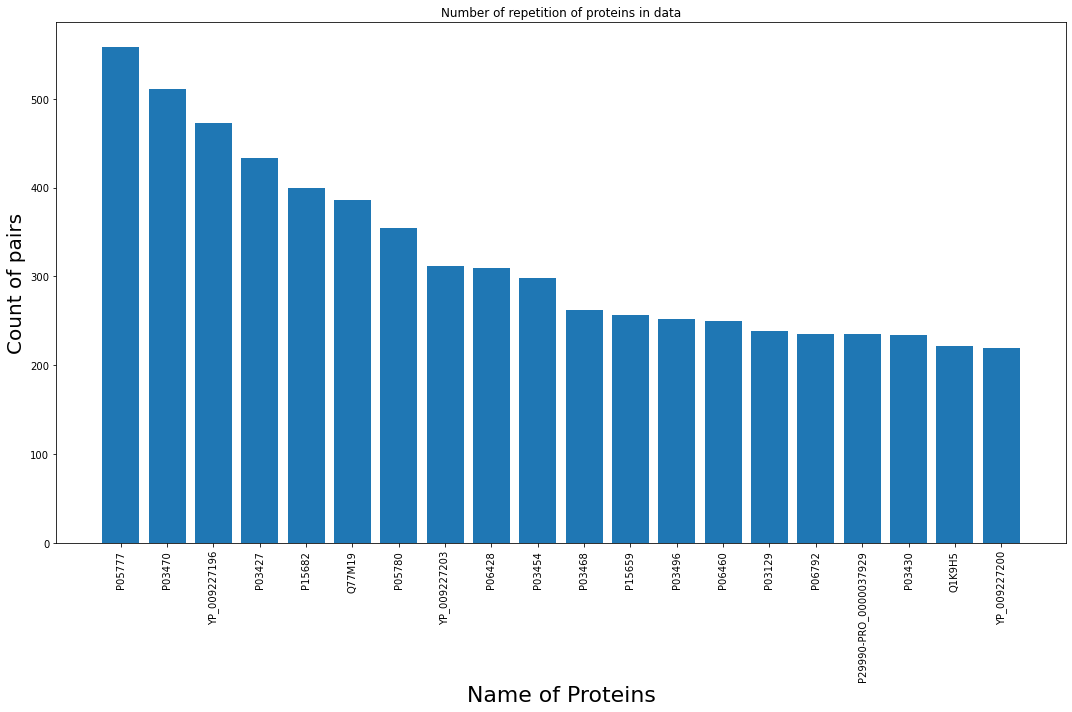

In [26]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

In [29]:
# count

### Summary of EDA
1. Published in paper:  LSTM-PHV(MINT,Virus Mentha, Intact)
2. Number of unique pairs: 22383
3. Number of proteins: 6878 
4. Max length of sequences: 999
5. Min lenght of sequences: 31
5. Top 5 redundant proteins: 


     P05777': 558,
     'P03470': 511,
     'YP_009227196': 473,
     'P03427': 433,
     'P15682': 400,